In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('/content/dataset.csv',sep='\t',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movies_titles=pd.read_csv('/content/movieIdTitles.csv')
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df=pd.merge(df,movies_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()



,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [6]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [7]:
rating=pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
rating['noOfratings']=df.groupby('title')['rating'].count()
rating.head()

,rating,noOfratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

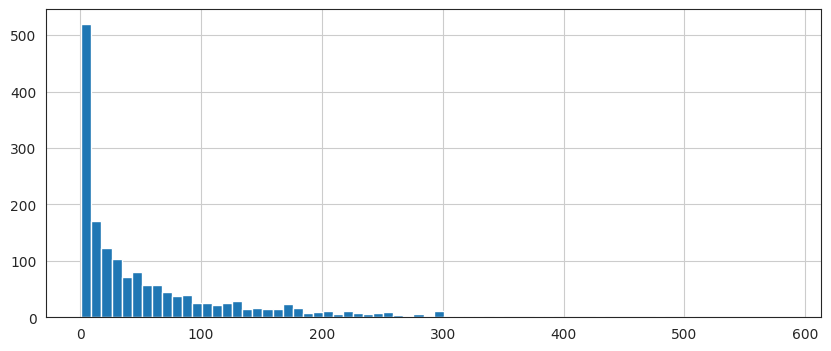

In [11]:
plt.figure(figsize=(10,4))
rating['noOfratings'].hist(bins=70)

<Axes: >

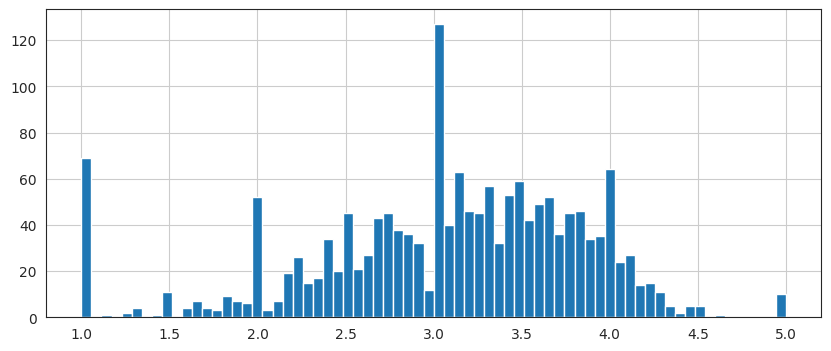

In [12]:
plt.figure(figsize=(10,4))
rating['rating'].hist(bins=70)

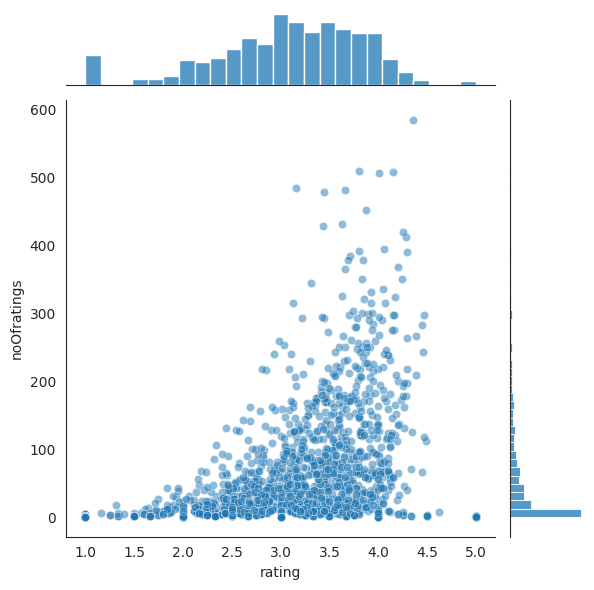

In [14]:
sns.jointplot(x='rating',y='noOfratings',data=rating,alpha=0.5)

In [16]:
movietime=pd.pivot_table(df,values='rating',index='user_id',columns='title')
movietime.head()



title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rating.sort_values('noOfratings',ascending=False).head(10)

,rating,noOfratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [23]:
for i in rating.index:
  movierating=movietime[i]  #he index is the user and the values are the ratings that each user has given to movie
  similarmovies=movietime.corrwith(movierating)
  corr=pd.DataFrame(similarmovies,columns=['correlation'])
  corr.dropna(inplace=True)
  corr=corr.join(rating['noOfratings'])
  results=corr[(corr['noOfratings']>100)].sort_values('correlation',ascending=False).head()
  print(results)
  if results['noOfratings'].count()>=5:
    print(i)
    rating.loc[i, 'FirstMovieRecommendation'] = results.iloc[1:2].index.values[0]
    rating.loc[i, 'SecondMovieRecommendation'] = results.iloc[2:3].index.values[0]
    rating.loc[i, 'ThirdMovieRecommendation'] = results.iloc[3:4].index.values[0]
    rating.loc[i, 'FourthMovieRecommendation'] = results.iloc[4:5].index.values[0]


Output hidden; open in https://colab.research.google.com to view.

In [24]:
results.head()

,correlation,noOfratings
title,,


In [26]:
rating = rating.fillna('-')

In [27]:
rating.to_csv('recommendations.csv',encoding='utf-8')

In [28]:
dff=pd.read_csv('/content/recommendations.csv')
dff.head()

,title,rating,noOfratings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)
